In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import talib
import warnings
warnings.filterwarnings("ignore")

In [64]:
T2306_df = pd.read_csv('/Users/tuxun/work/jnwork/建模大赛/HFtrading/data/bond/future.csv')
B220220_df = pd.read_csv('/Users/tuxun/work/jnwork/建模大赛/HFtrading/data/bond/lobs.csv')

In [65]:
T2306_df['ts'] = T2306_df['ts'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))
T2306_df.index = pd.to_datetime(T2306_df['ts'])
T2306_df['midprice'] = (T2306_df['ask1'] + T2306_df['bid1']) / 2
T2306_df = T2306_df[~T2306_df.index.duplicated()]

B220220_df['ts'] = B220220_df['ts'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))
B220220_df.index = pd.to_datetime(B220220_df['ts'])
B220220_df['midprice'] = (B220220_df['pask1'] + B220220_df['pbid1']) / 2
B220220_df['ymidprice'] = (B220220_df['yask1'] + B220220_df['ybid1']) / 2
B220220_df['yspread'] = B220220_df['ybid1'] - B220220_df['yask1']
B220220_df['pspread'] = B220220_df['pask1'] - B220220_df['pbid1']
B220220_df = B220220_df[~B220220_df.index.duplicated()]

In [66]:
start_time = '2023-03-23 9:30:00'
end_time = '2023-04-18 15:15:00'
T2306_df = T2306_df.loc[start_time: end_time]
B220220_df = B220220_df.loc[start_time: end_time]

T2306_df = T2306_df.between_time('9:30', '11:30').append(T2306_df.between_time('13:30', '15:15'))
B220220_df = B220220_df.between_time('9:30', '11:30').append(B220220_df.between_time('13:30', '15:15'))

    

<AxesSubplot:xlabel='ts'>

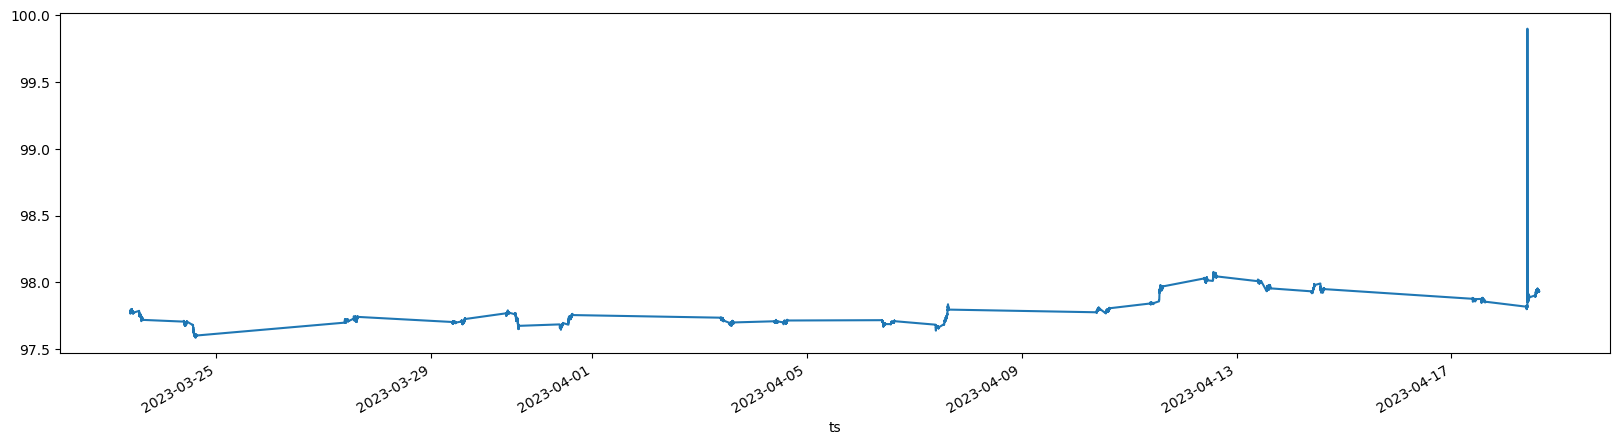

In [49]:
B220220_df['midprice'].plot(figsize=(20, 5))

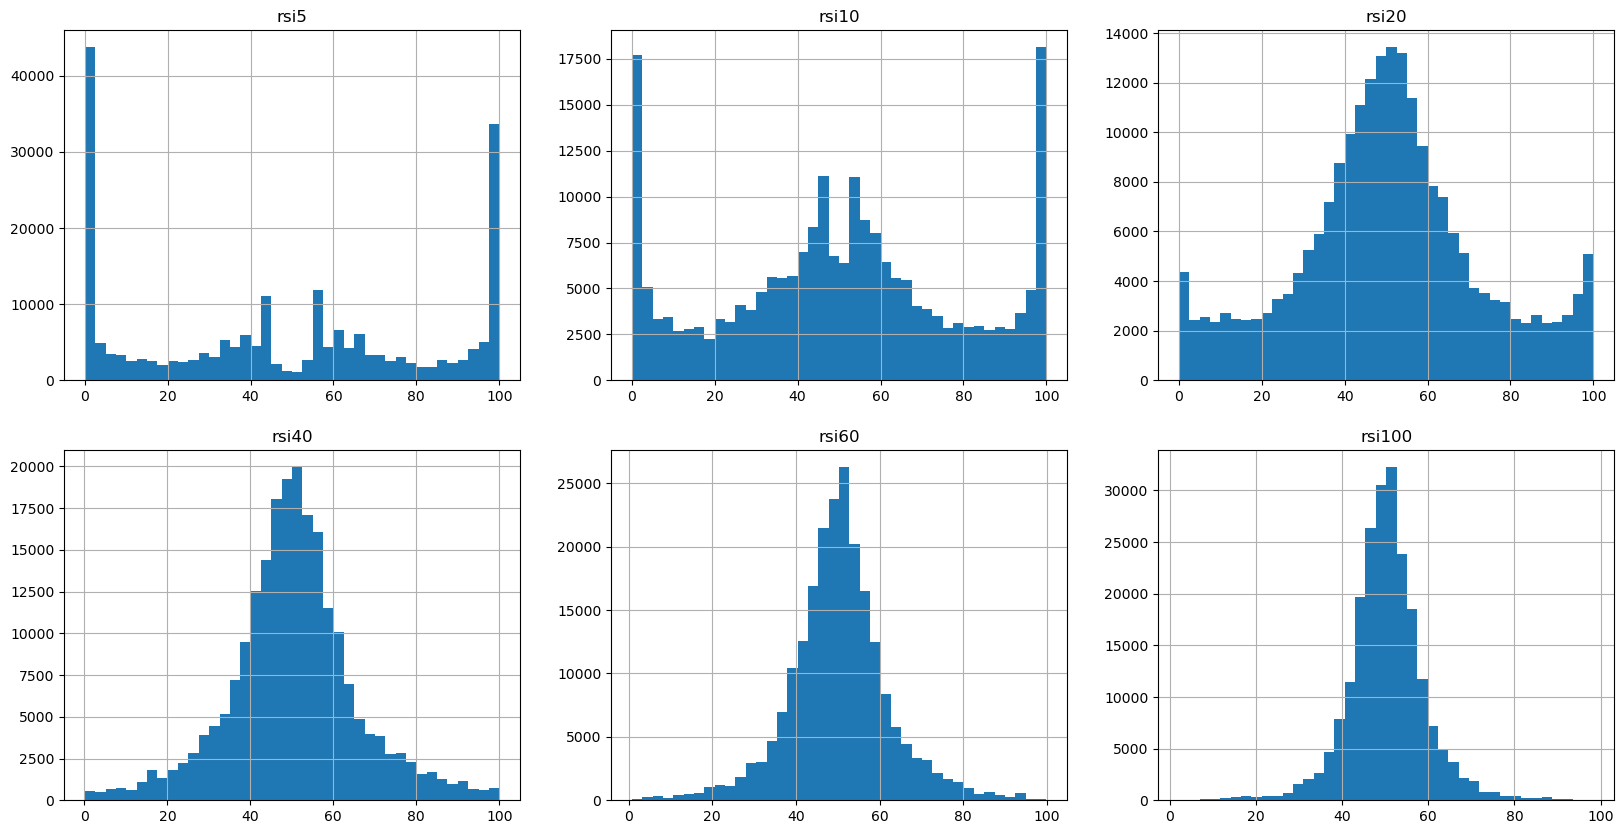

In [67]:
#计算T2306_df的RSI,取不同的timeperiod,计算不同的RSI
T2306_df['rsi5'] = talib.RSI(T2306_df['midprice'], timeperiod = 5)
T2306_df['rsi10'] = talib.RSI(T2306_df['midprice'], timeperiod = 10)
T2306_df['rsi20'] = talib.RSI(T2306_df['midprice'], timeperiod = 20)
T2306_df['rsi40'] = talib.RSI(T2306_df['midprice'], timeperiod = 40)
T2306_df['rsi60'] = talib.RSI(T2306_df['midprice'], timeperiod = 60)
T2306_df['rsi100'] = talib.RSI(T2306_df['midprice'], timeperiod = 100)
#画出分布图，画在一张画布上，bins取40，需要给每个图添加描述，以及图例
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
T2306_df['rsi5'].hist(bins=40, ax=ax[0, 0])
ax[0, 0].set_title('rsi5')
T2306_df['rsi10'].hist(bins=40, ax=ax[0, 1])
ax[0, 1].set_title('rsi10')
T2306_df['rsi20'].hist(bins=40, ax=ax[0, 2])
ax[0, 2].set_title('rsi20')
T2306_df['rsi40'].hist(bins=40, ax=ax[1, 0])
ax[1, 0].set_title('rsi40')
T2306_df['rsi60'].hist(bins=40, ax=ax[1, 1])
ax[1, 1].set_title('rsi60')
T2306_df['rsi100'].hist(bins=40, ax=ax[1, 2])
ax[1, 2].set_title('rsi100')
plt.show()

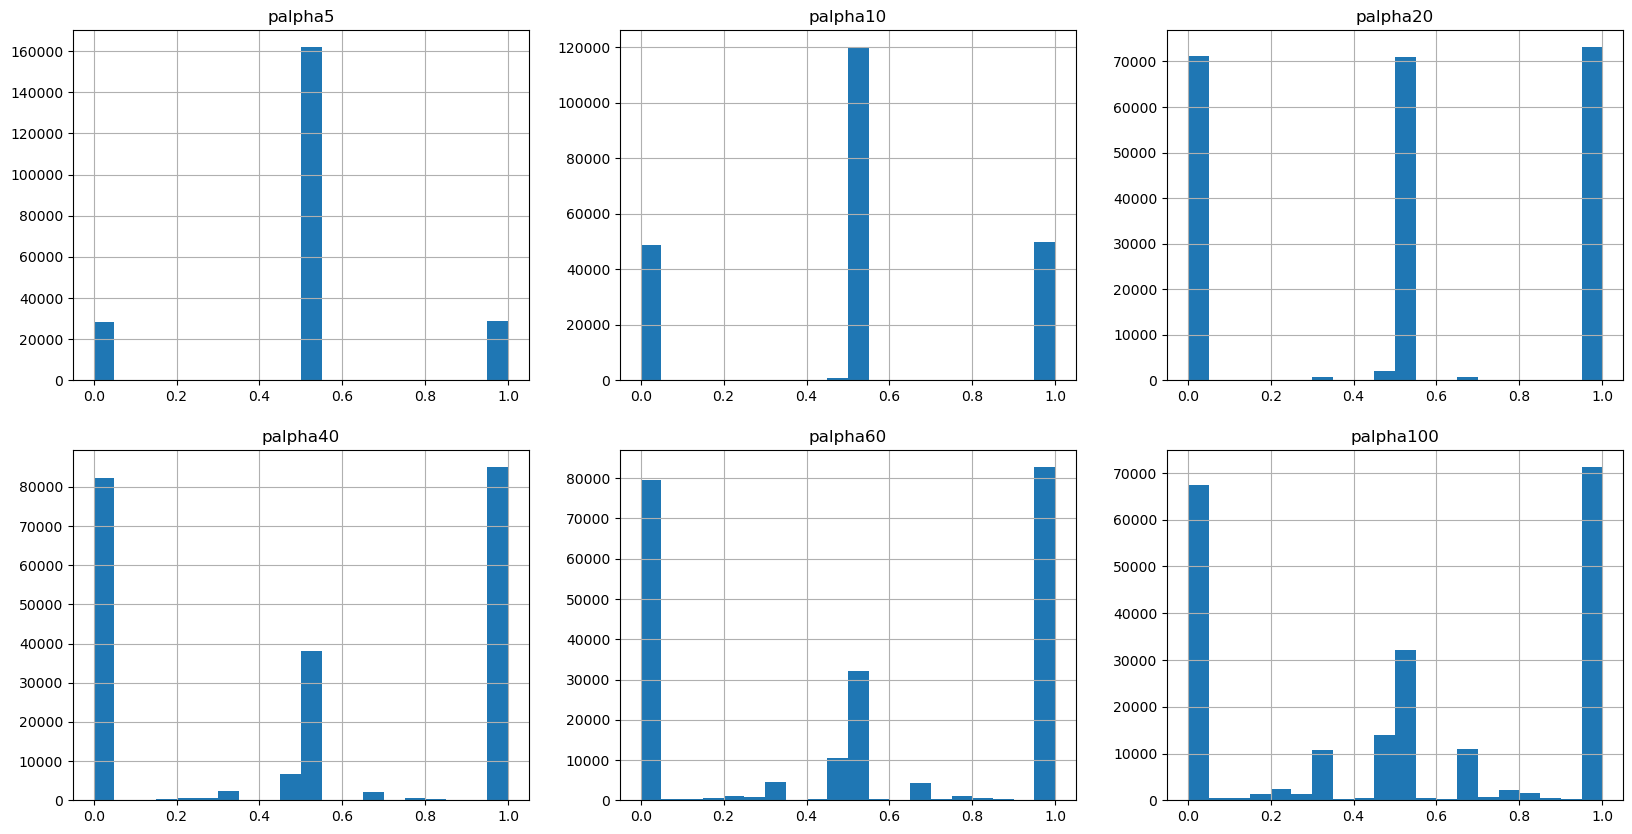

In [68]:
#定义palpha = (close - low) / (high - low), 滚动计算palpha
def calpalpha(plist):
    low = min(plist)
    high = max(plist)
    close = plist[-1]
    if high > low:
        return (close - low) / (high - low)
    else:
        return 0.5

#rolling计算
T2306_df['palpha5']  = T2306_df['midprice'].rolling(5).apply(calpalpha)
T2306_df['palpha10']  = T2306_df['midprice'].rolling(10).apply(calpalpha)
T2306_df['palpha20']  = T2306_df['midprice'].rolling(20).apply(calpalpha)
T2306_df['palpha40']  = T2306_df['midprice'].rolling(40).apply(calpalpha)
T2306_df['palpha60']  = T2306_df['midprice'].rolling(60).apply(calpalpha)
T2306_df['palpha100']  = T2306_df['midprice'].rolling(100).apply(calpalpha)

#画出分布图，画在一张画布上，bins取40，需要给每个图添加描述，以及图例
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
T2306_df['palpha5'].hist(bins=20, ax=ax[0, 0])
ax[0, 0].set_title('palpha5')
T2306_df['palpha10'].hist(bins=20, ax=ax[0, 1])
ax[0, 1].set_title('palpha10')
T2306_df['palpha20'].hist(bins=20, ax=ax[0, 2])
ax[0, 2].set_title('palpha20')
T2306_df['palpha40'].hist(bins=20, ax=ax[1, 0])
ax[1, 0].set_title('palpha40')
T2306_df['palpha60'].hist(bins=20, ax=ax[1, 1])
ax[1, 1].set_title('palpha60')
T2306_df['palpha100'].hist(bins=20, ax=ax[1, 2])
ax[1, 2].set_title('palpha100')
plt.show()

In [69]:
date_str = '2023-03-23'
start_time = date_str + ' 09:30:00'
end_time = date_str + ' 15:15:00'
t0323 = T2306_df.loc[start_time:end_time]
b0323 = B220220_df.loc[start_time:end_time]


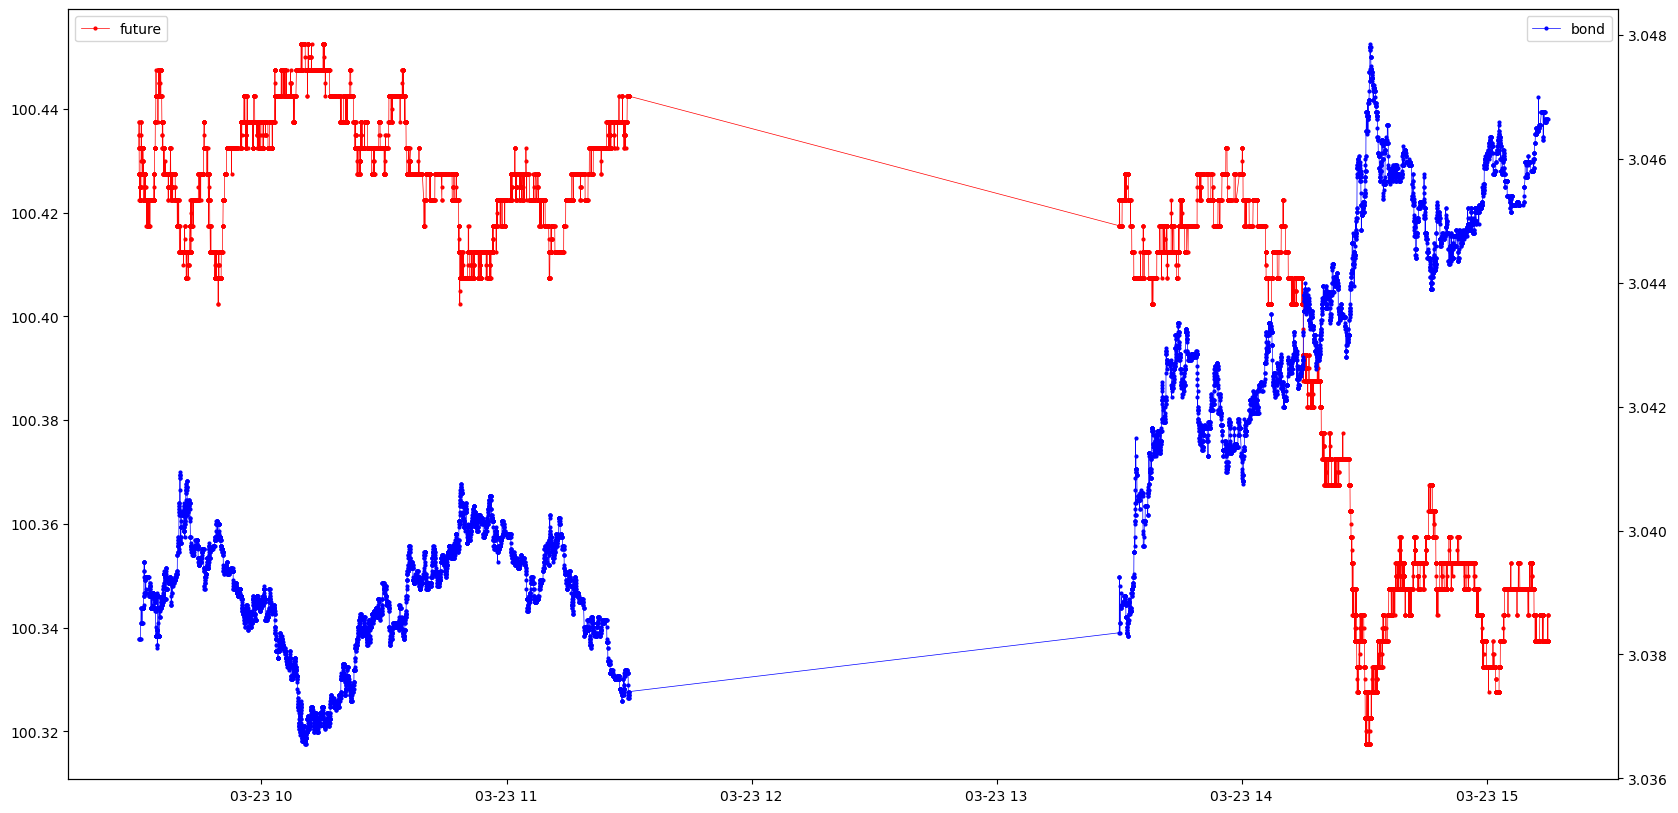

In [70]:
#让两个图用同一个y轴
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
ax1.plot(t0323['midprice'], 'r-', marker='o', markersize=2, linewidth=0.5)
ax2.plot(b0323['ymidprice'], 'b-', marker='o', markersize=2, linewidth=0.5)

#加上图例
ax1.legend(['future'], loc=2)
ax2.legend(['bond'], loc=1)
#ax3.legend(['ymidprice'], loc=0)

In [71]:
#定义stepsig,找到有阶跃的点，计算阶跃的幅度
def stepsig(x):
    sig_len = len(x)
    before = x[-sig_len:-sig_len//2]
    after = x[-sig_len//2:]
    b = min(after) - max(before)
    s = min(before) - max(after)
    if b >= 0.0049:
        return x[-1] - x[0]
    elif s >= 0.0049:
        return x[-1] - x[0]
    else:  
        return 0

#rolling计算
T2306_df['stepsig4']  = T2306_df['midprice'].rolling(4).apply(stepsig)
T2306_df['stepsig6']  = T2306_df['midprice'].rolling(6).apply(stepsig)
T2306_df['stepsig8']  = T2306_df['midprice'].rolling(8).apply(stepsig)
T2306_df['stepsig10']  = T2306_df['midprice'].rolling(10).apply(stepsig)
T2306_df['stepsig12']  = T2306_df['midprice'].rolling(12).apply(stepsig)
T2306_df['stepsig24']  = T2306_df['midprice'].rolling(24).apply(stepsig)

In [72]:
#打印非零的值的占比
print('stepsig4', T2306_df['stepsig4'].loc[T2306_df['stepsig4'] != 0].count() / T2306_df['stepsig4'].count())
print('stepsig6', T2306_df['stepsig6'].loc[T2306_df['stepsig6'] != 0].count() / T2306_df['stepsig6'].count())
print('stepsig8', T2306_df['stepsig8'].loc[T2306_df['stepsig8'] != 0].count() / T2306_df['stepsig8'].count())
print('stepsig10', T2306_df['stepsig10'].loc[T2306_df['stepsig10'] != 0].count() / T2306_df['stepsig10'].count())
print('stepsig12', T2306_df['stepsig12'].loc[T2306_df['stepsig12'] != 0].count() / T2306_df['stepsig12'].count())
print('stepsig24', T2306_df['stepsig24'].loc[T2306_df['stepsig24'] != 0].count() / T2306_df['stepsig24'].count())

stepsig4 0.03880471993590211
stepsig6 0.030405805282661545
stepsig8 0.024724574342165163
stepsig10 0.02197507033661419
stepsig12 0.019840113632224935
stepsig24 0.012001238367540202


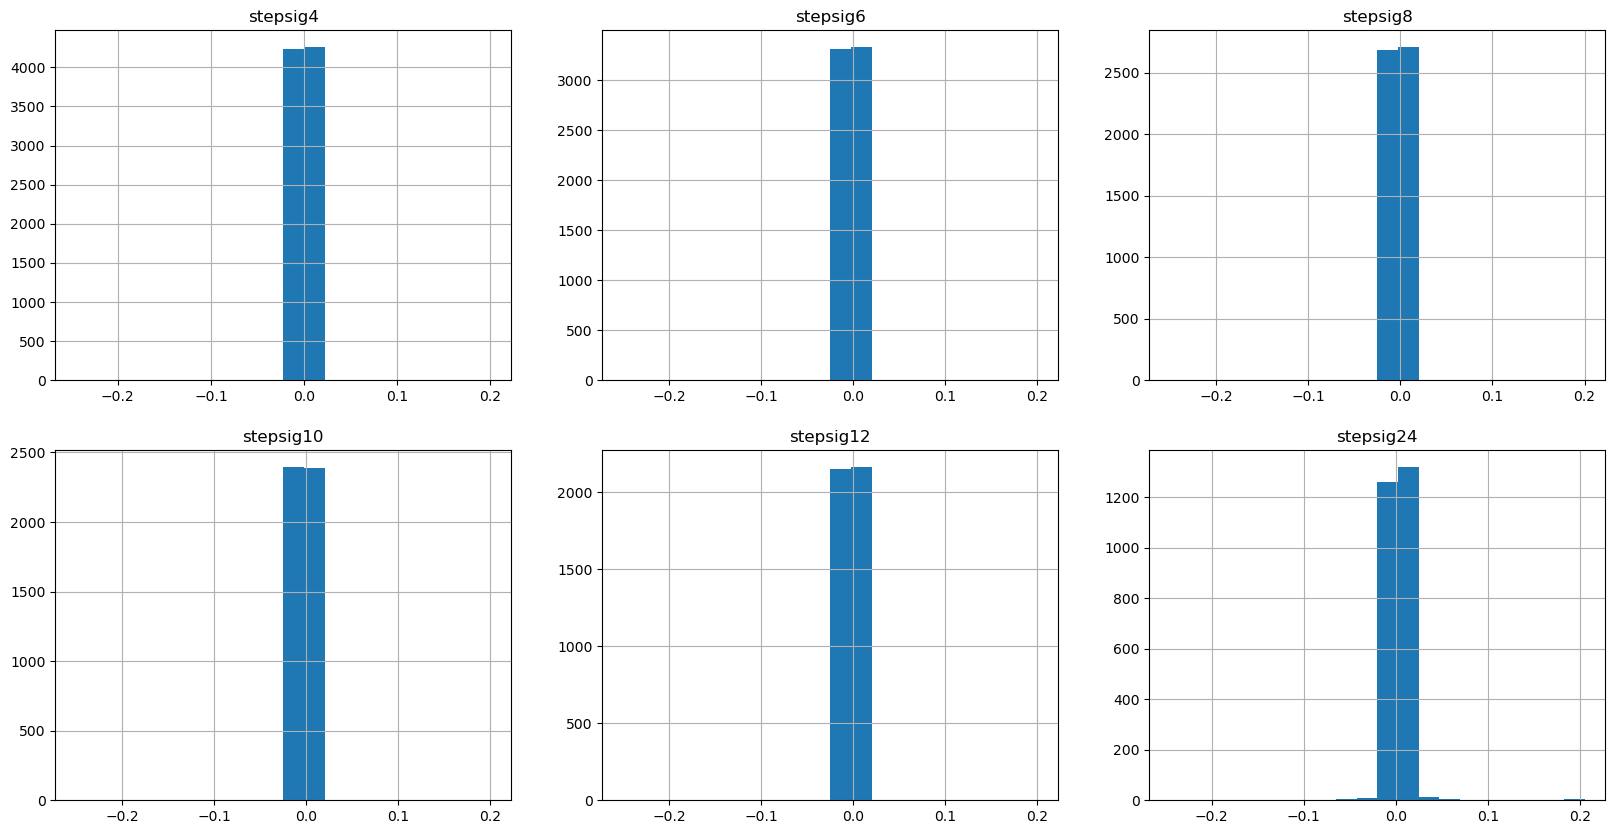

In [73]:
#统计非零的值的分布，画在一张图上
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
T2306_df['stepsig4'].loc[T2306_df['stepsig4'] != 0].hist(bins=20, ax=ax[0, 0])
ax[0, 0].set_title('stepsig4')
T2306_df['stepsig6'].loc[T2306_df['stepsig6'] != 0].hist(bins=20, ax=ax[0, 1])
ax[0, 1].set_title('stepsig6')
T2306_df['stepsig8'].loc[T2306_df['stepsig8'] != 0].hist(bins=20, ax=ax[0, 2])
ax[0, 2].set_title('stepsig8')
T2306_df['stepsig10'].loc[T2306_df['stepsig10'] != 0].hist(bins=20, ax=ax[1, 0])
ax[1, 0].set_title('stepsig10')
T2306_df['stepsig12'].loc[T2306_df['stepsig12'] != 0].hist(bins=20, ax=ax[1, 1])
ax[1, 1].set_title('stepsig12')
T2306_df['stepsig24'].loc[T2306_df['stepsig24'] != 0].hist(bins=20, ax=ax[1, 2])
ax[1, 2].set_title('stepsig24')
plt.show()

In [30]:
B220220_df

,ts,symbol,month,day,pask1,pask2,pask3,pask4,pask5,pask6,...,ybid6,ybid7,ybid8,ybid9,ybid10,year,midprice,ymidprice,yspread,pspread
ts,,,,,,,,,,,,,,,,,,,,,
2023-03-23 09:30:00.392,2023-03-23 09:30:00.392,220220.T1.CASH.BOND.ANO.ODM.CFETS.XBOND,2023-03,2023-03-23,97.7898,97.7922,97.7930,97.7937,97.7938,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,97.78775,3.03825,0.0005,0.0041
2023-03-23 09:30:06.429,2023-03-23 09:30:06.429,220220.T1.CASH.BOND.ANO.ODM.CFETS.XBOND,2023-03,2023-03-23,97.7898,97.7906,97.7922,97.7930,97.7937,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,97.78775,3.03825,0.0005,0.0041
2023-03-23 09:30:10.452,2023-03-23 09:30:10.452,220220.T1.CASH.BOND.ANO.ODM.CFETS.XBOND,2023-03,2023-03-23,97.7898,97.7906,97.7922,97.7930,97.7937,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,97.78775,3.03825,0.0005,0.0041
2023-03-23 09:30:16.485,2023-03-23 09:30:16.485,220220.T1.CASH.BOND.ANO.ODM.CFETS.XBOND,2023-03,2023-03-23,97.7898,97.7906,97.7922,97.7930,97.7937,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,97.78775,3.03825,0.0005,0.0041
2023-03-23 09:30:23.531,2023-03-23 09:30:23.531,220220.T1.CASH.BOND.ANO.ODM.CFETS.XBOND,2023-03,2023-03-23,97.7898,97.7906,97.7922,97.7930,97.7937,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,97.78775,3.03825,0.0005,0.0041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 18:59:22.159,2023-03-31 18:59:22.159,220220.T1.CASH.BOND.ANO.ODM.CFETS.XBOND,2023-03,2023-03-31,97.7587,97.7627,97.7667,97.7748,97.7789,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,97.74860,3.04375,0.0025,0.0202
2023-03-31 19:08:02.143,2023-03-31 19:08:02.143,220220.T1.CASH.BOND.ANO.ODM.CFETS.XBOND,2023-03,2023-03-31,97.7587,97.7627,97.7667,97.7748,97.7789,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,97.74860,3.04375,0.0025,0.0202
2023-03-31 19:34:05.084,2023-03-31 19:34:05.084,220220.T1.CASH.BOND.ANO.ODM.CFETS.XBOND,2023-03,2023-03-31,97.7587,97.7627,97.7667,97.7748,97.7789,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,97.74860,3.04375,0.0025,0.0202


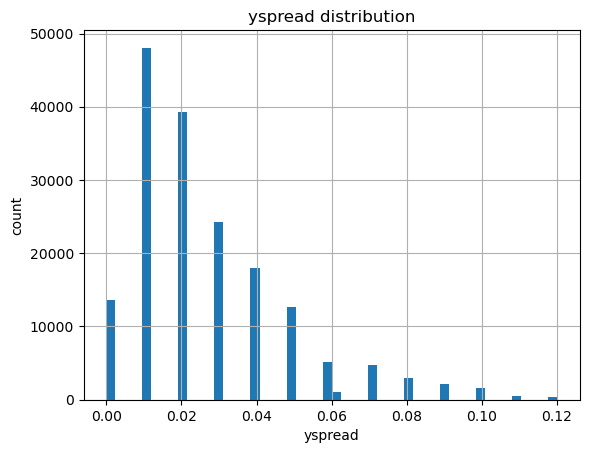

In [80]:
q_low = B220220_df['yspread'].quantile(0.01)
q_high = B220220_df['yspread'].quantile(0.99)
df_filtered = B220220_df['yspread'][(B220220_df['yspread'] >= q_low) & (B220220_df['yspread'] <= q_high)]
df_filtered = df_filtered * 100
df_filtered.hist(bins=50)
#对图形进行美化
plt.xlabel('yspread')
plt.ylabel('count')
plt.title('yspread distribution')
plt.show()

In [79]:
0.000272 * 100


0.0272

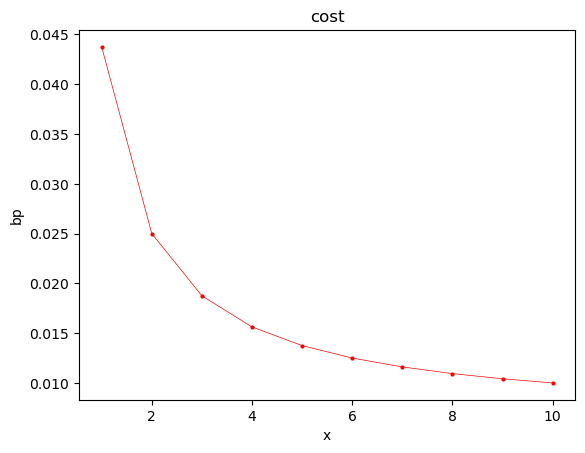

In [83]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [2*(150 + 25*i)/i /80 * 0.01 for i in x]

#画出曲线
plt.plot(x, y, 'r-', marker='o', markersize=2, linewidth=0.5)
plt.xlabel('x')
plt.ylabel('bp')
plt.title('cost')

plt.show()

In [88]:
start_time = '2023-03-28 9:30:00'
end_time = '2023-03-28 15:15:00'
bb = B220220_df.loc[start_time: end_time]
tt = T2306_df.loc[start_time: end_time]
tt

,ts,last,bid1,ask1,volume,midprice,rsi5,rsi10,rsi20,rsi40,...,palpha20,palpha40,palpha60,palpha100,stepsig4,stepsig6,stepsig8,stepsig10,stepsig12,stepsig24
ts,,,,,,,,,,,,,,,,,,,,,
2023-03-28 09:30:00.000,2023-03-28 09:30:00.000,100.405,100.405,100.410,189.0,100.4075,0.010020,0.743539,6.223763,17.986358,...,0.000000,0.000000,0.000000,0.000,0.000,0.00,0.000,0.000,0.0,0.0
2023-03-28 09:30:00.500,2023-03-28 09:30:00.500,100.405,100.405,100.410,252.0,100.4075,0.010020,0.743539,6.223763,17.986358,...,0.000000,0.000000,0.000000,0.000,-0.025,0.00,0.000,0.000,0.0,0.0
2023-03-28 09:30:01.000,2023-03-28 09:30:01.000,100.405,100.400,100.405,300.0,100.4025,0.007636,0.599016,5.239254,15.939034,...,0.000000,0.000000,0.000000,0.000,0.000,-0.03,0.000,0.000,0.0,0.0
2023-03-28 09:30:01.500,2023-03-28 09:30:01.500,100.405,100.405,100.410,377.0,100.4075,22.932756,18.253668,18.765659,24.726812,...,0.166667,0.153846,0.142857,0.125,0.000,0.00,-0.025,0.000,0.0,0.0
2023-03-28 09:30:02.000,2023-03-28 09:30:02.000,100.405,100.405,100.410,407.0,100.4075,22.932756,18.253668,18.765659,24.726812,...,0.166667,0.153846,0.142857,0.125,0.000,0.00,0.000,-0.025,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 15:14:58.000,2023-03-28 15:14:58.000,100.445,100.445,100.450,46869.0,100.4475,67.474483,66.303221,66.830474,66.177402,...,1.000000,1.000000,1.000000,1.000,0.000,0.00,0.000,0.000,0.0,0.0
2023-03-28 15:14:58.500,2023-03-28 15:14:58.500,100.450,100.445,100.450,46875.0,100.4475,67.474483,66.303221,66.830474,66.177402,...,1.000000,1.000000,1.000000,1.000,0.000,0.00,0.000,0.000,0.0,0.0
2023-03-28 15:14:59.000,2023-03-28 15:14:59.000,100.440,100.440,100.445,46882.0,100.4425,5.374147,23.525578,38.349863,46.896698,...,0.000000,0.000000,0.000000,0.500,0.000,0.00,0.000,0.000,0.0,0.0
